# Chap03 - 다변량 정규 분포

## 0. imports

In [1]:
%load_ext jupyter_black

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 3.2

In [3]:
def multivariate_normal(x, mu, cov):
    det = np.linalg.det(cov)
    inv = np.linalg.inv(cov)
    D = len(x)
    z = 1 / np.sqrt((2 * np.pi) ** D * det)
    y = z * np.exp((x - mu).T @ inv @ (x - mu) / -2.0)
    return y

In [4]:
x = np.array([0, 0])
mu = np.array([1, 2])
cov = np.array([[1, 0], [0, 1]])

y = multivariate_normal(x, mu, cov)
print(y)

0.013064233284684921


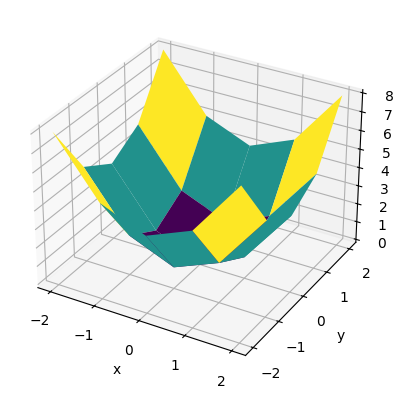

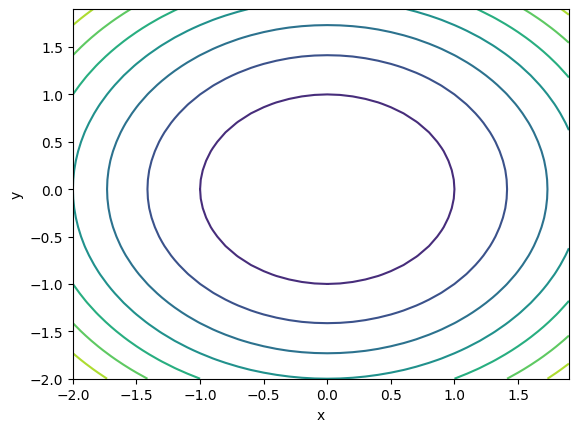

In [6]:
X = np.array(
    [
        [-2, -1, 0, 1, 2],
        [-2, -1, 0, 1, 2],
        [-2, -1, 0, 1, 2],
        [-2, -1, 0, 1, 2],
        [-2, -1, 0, 1, 2],
    ]
)
Y = np.array(
    [
        [-2, -2, -2, -2, -2],
        [-1, -1, -1, -1, -1],
        [0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2],
    ]
)

# ===== better resolution =====
# x = y = np.arange(-2, 2, 0.1)
# X, Y = np.meshgrid(x, y)
# =============================

Z = X**2 + Y**2

ax = plt.axes(projection="3d")
ax.plot_surface(X, Y, Z, cmap="viridis")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

# ===== plot contour =====
x = np.arange(-2, 2, 0.1)
y = np.arange(-2, 2, 0.1)

X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

ax = plt.axes()
ax.contour(X, Y, Z)
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()

### plot_norm

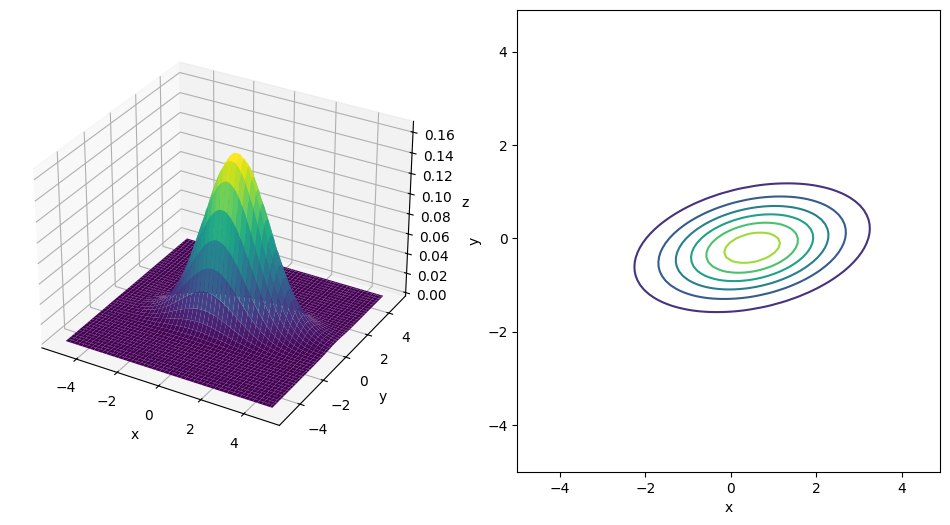

In [7]:
import numpy as np
import matplotlib.pyplot as plt


def multivariate_normal(x, mu, cov):
    det = np.linalg.det(cov)
    inv = np.linalg.inv(cov)
    D = len(x)
    z = 1 / np.sqrt((2 * np.pi) ** D * det)
    y = z * np.exp((x - mu).T @ inv @ (x - mu) / -2.0)
    return y


mu = np.array([0.5, -0.2])
cov = np.array([[2.0, 0.3], [0.3, 0.5]])

xs = ys = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(xs, ys)
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = np.array([X[i, j], Y[i, j]])
        Z[i, j] = multivariate_normal(x, mu, cov)

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1, 2, 1, projection="3d")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("z")
ax1.plot_surface(X, Y, Z, cmap="viridis")

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.contour(X, Y, Z)
plt.show()

## 3.4

### plot_dataset

(25000, 2)


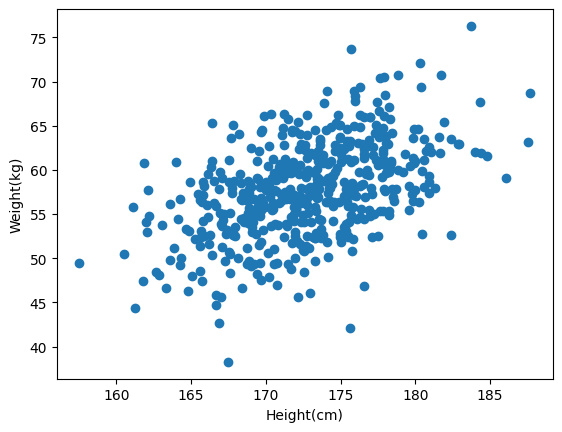

In [9]:
import numpy as np
import matplotlib.pyplot as plt

path = "../data/height_weight.txt"
xs = np.loadtxt(path)

print(xs.shape)

small_xs = xs[:500]
plt.scatter(small_xs[:, 0], small_xs[:, 1])
plt.xlabel("Height(cm)")
plt.ylabel("Weight(kg)")
plt.show()

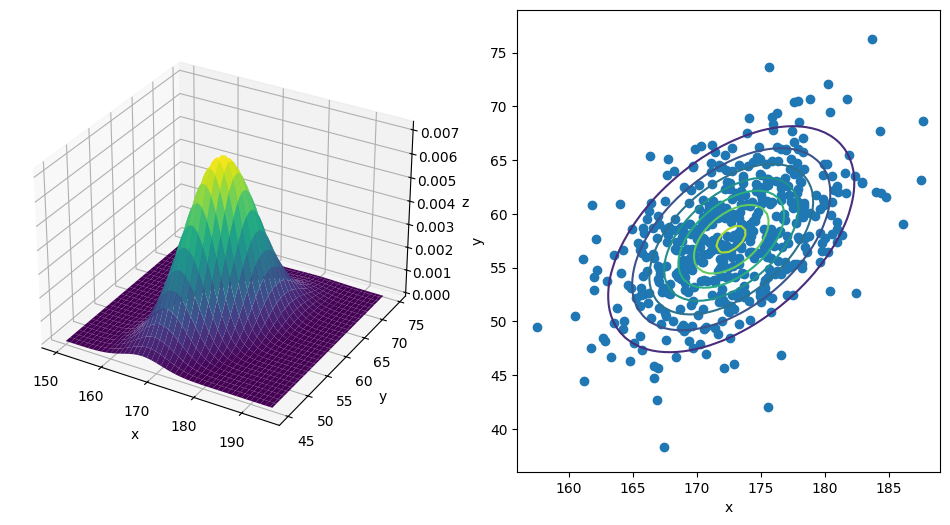

In [10]:
# Maximum Likelihood Estimation(MLE)
mu = np.mean(xs, axis=0)
cov = np.cov(xs, rowvar=False)


def multivariate_normal(x, mu, cov):
    det = np.linalg.det(cov)
    inv = np.linalg.inv(cov)
    d = len(x)
    z = 1 / np.sqrt((2 * np.pi) ** d * det)
    y = z * np.exp((x - mu).T @ inv @ (x - mu) / -2.0)
    return y


small_xs = xs[:500]
X, Y = np.meshgrid(np.arange(150, 195, 0.5), np.arange(45, 75, 0.5))
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = np.array([X[i, j], Y[i, j]])
        Z[i, j] = multivariate_normal(x, mu, cov)

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1, 2, 1, projection="3d")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("z")
ax1.plot_surface(X, Y, Z, cmap="viridis")

ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(small_xs[:, 0], small_xs[:, 1])
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_xlim(156, 189)
ax2.set_ylim(36, 79)
ax2.contour(X, Y, Z)
plt.show()